# EDA for NASA Turbo Fan Jet Engine Dataset
Using NASA's Turbofan Jet Engine dataset to predict RUL (Remaining useful life) for predicive maintainance

Dataset link: [NASA's Prognostics Data Repository](https://www.nasa.gov/intelligent-systems-division/discovery-and-systems-health/pcoe/pcoe-data-set-repository/) 

Listed as Dataset #6

## 1. Import and load in raw data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load in dataset and label columns
col_names = (
    ["unit_number", "time_in_cycles"] + 
    [f"operational_setting_{i}" for i in range(1,4)] +
    [f"sensor_{i}" for i in range(1, 22)]
)

df = pd.read_csv("data/train_FD001.txt", sep=r"\s+", header=None, names=col_names)

In [3]:
df

unit_number  time_in_cycles  operational_setting_1  \
0                1               1                -0.0007   
1                1               2                 0.0019   
2                1               3                -0.0043   
3                1               4                 0.0007   
4                1               5                -0.0019   
...            ...             ...                    ...   
20626          100             196                -0.0004   
20627          100             197                -0.0016   
20628          100             198                 0.0004   
20629          100             199                -0.0011   
20630          100             200                -0.0032   

       operational_setting_2  operational_setting_3  sensor_1  sensor_2  \
0                    -0.0004                  100.0    518.67    641.82   
1                    -0.0003                  100.0    518.67    642.15   
2                     0.0003                  100.0    518.67    642.35   
3                     0.0000                  100.0    518.67    642.35   
4                    -0.0002                  100.0    518.67    642.37   
...                      ...                    ...       ...       ...   
20626                -0.0003                  100.0    518.67    643.49   
20627                -0.0005                  100.0    518.67    643.54   
20628                 0.0000                  100.0    518.67    643.42   
20629                 0.0003                  100.0    518.67    643.23   
20630                -0.0005                  100.0    518.67    643.85   

       sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  sensor_14  \
0       1589.70   1400.60     14.62  ...     521.66    2388.02    8138.62   
1       1591.82   1403.14     14.62  ...     522.28    2388.07    8131.49   
2       1587.99   1404.20     14.62  ...     522.42    2388.03    8133.23   
3       1582.79   1401.87     14.62  ...     522.86    2388.08    8133.83   
4       1582.85   1406.22     14.62  ...     522.19    2388.04    8133.80   
...         ...       ...       ...  ...        ...        ...        ...   
20626   1597.98   1428.63     14.62  ...     519.49    2388.26    8137.60   
20627   1604.50   1433.58     14.62  ...     519.68    2388.22    8136.50   
20628   1602.46   1428.18     14.62  ...     520.01    2388.24    8141.05   
20629   1605.26   1426.53     14.62  ...     519.67    2388.23    8139.29   
20630   1600.38   1432.14     14.62  ...     519.30    2388.26    8137.33   

       sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  \
0         8.4195       0.03        392       2388      100.0      39.06   
1         8.4318       0.03        392       2388      100.0      39.00   
2         8.4178       0.03        390       2388      100.0      38.95   
3         8.3682       0.03        392       2388      100.0      38.88   
4         8.4294       0.03        393       2388      100.0      38.90   
...          ...        ...        ...        ...        ...        ...   
20626     8.4956       0.03        397       2388      100.0      38.49   
20627     8.5139       0.03        395       2388      100.0      38.30   
20628     8.5646       0.03        398       2388      100.0      38.44   
20629     8.5389       0.03        395       2388      100.0      38.29   
20630     8.5036       0.03        396       2388      100.0      38.37   

       sensor_21  
0        23.4190  
1        23.4236  
2        23.3442  
3        23.3739  
4        23.4044  
...          ...  
20626    22.9735  
20627    23.1594  
20628    22.9333  
20629    23.0640  
20630    23.0522  

[20631 rows x 26 columns]

## 2. Creating RUL and Exploring Target Variable Distributions

In [4]:
# Get max cycle for each engine
rul_lookup = df.groupby("unit_number")["time_in_cycles"].max().reset_index()
rul_lookup.columns = ["unit_number", "max_cycle"]
rul_lookup

unit_number  max_cycle
0             1        192
1             2        287
2             3        179
3             4        189
4             5        269
..          ...        ...
95           96        336
96           97        202
97           98        156
98           99        185
99          100        200

[100 rows x 2 columns]

In [5]:
# Merge max_cycle for each unit back into the dataframe to calculate RUL
df = df.merge(rul_lookup, on="unit_number")
df['RUL'] = df["max_cycle"] - df["time_in_cycles"]

In [6]:
# Square root rule to decide number of bins
num_bins = int(np.sqrt(20631))

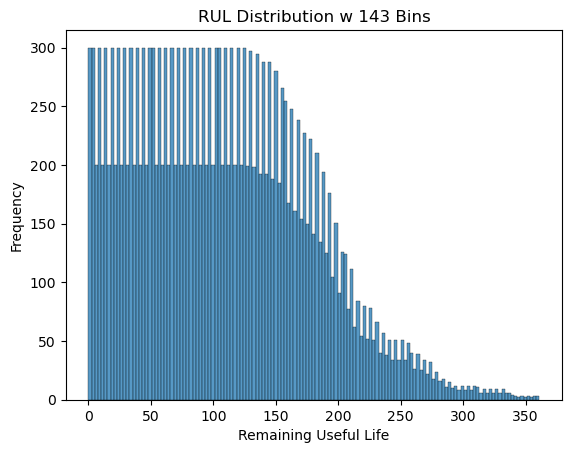

In [7]:
# Plot RUL distribution with square root rule
sns.histplot(data=df, x="RUL", bins=num_bins)
plt.title("RUL Distribution w 143 Bins")
plt.xlabel("Remaining Useful Life")
plt.ylabel("Frequency")
plt.show()

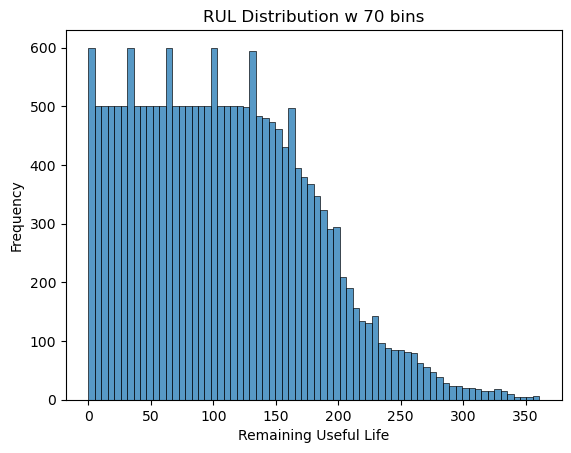

In [8]:
# Plot RUL distribution with lower number of bins
sns.histplot(data=df, x="RUL", bins=70)
plt.title("RUL Distribution w 70 bins")
plt.xlabel("Remaining Useful Life")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Get list of column names
df_columns = df.columns

## 3. Data Summary

In [11]:
# Check for nulls in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_1               20631 non-null  float64
 6   sensor_2               20631 non-null  float64
 7   sensor_3               20631 non-null  float64
 8   sensor_4               20631 non-null  float64
 9   sensor_5               20631 non-null  float64
 10  sensor_6               20631 non-null  float64
 11  sensor_7               20631 non-null  float64
 12  sensor_8               20631 non-null  float64
 13  sensor_9               20631 non-null  float64
 14  sensor_10              20631 non-null  float64
 15  se

In [12]:
# Check shape of the datset
df.shape

(20631, 28)

In [13]:
# Generate simple statistics for each feature
df.describe()

unit_number  time_in_cycles  operational_setting_1  \
count  20631.000000    20631.000000           20631.000000   
mean      51.506568      108.807862              -0.000009   
std       29.227633       68.880990               0.002187   
min        1.000000        1.000000              -0.008700   
25%       26.000000       52.000000              -0.001500   
50%       52.000000      104.000000               0.000000   
75%       77.000000      156.000000               0.001500   
max      100.000000      362.000000               0.008700   

       operational_setting_2  operational_setting_3      sensor_1  \
count           20631.000000                20631.0  2.063100e+04   
mean                0.000002                  100.0  5.186700e+02   
std                 0.000293                    0.0  6.537152e-11   
min                -0.000600                  100.0  5.186700e+02   
25%                -0.000200                  100.0  5.186700e+02   
50%                 0.000000                  100.0  5.186700e+02   
75%                 0.000300                  100.0  5.186700e+02   
max                 0.000600                  100.0  5.186700e+02   

           sensor_2      sensor_3      sensor_4      sensor_5  ...  \
count  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.500053      6.131150      9.000605  3.394700e-12  ...   
min      641.210000   1571.040000   1382.250000  1.462000e+01  ...   
25%      642.325000   1586.260000   1402.360000  1.462000e+01  ...   
50%      642.640000   1590.100000   1408.040000  1.462000e+01  ...   
75%      643.000000   1594.380000   1414.555000  1.462000e+01  ...   
max      644.530000   1616.910000   1441.490000  1.462000e+01  ...   

          sensor_14     sensor_15     sensor_16     sensor_17  sensor_18  \
count  20631.000000  20631.000000  2.063100e+04  20631.000000    20631.0   
mean    8143.752722      8.442146  3.000000e-02    393.210654     2388.0   
std       19.076176      0.037505  1.556432e-14      1.548763        0.0   
min     8099.940000      8.324900  3.000000e-02    388.000000     2388.0   
25%     8133.245000      8.414900  3.000000e-02    392.000000     2388.0   
50%     8140.540000      8.438900  3.000000e-02    393.000000     2388.0   
75%     8148.310000      8.465600  3.000000e-02    394.000000     2388.0   
max     8293.720000      8.584800  3.000000e-02    400.000000     2388.0   

       sensor_19     sensor_20     sensor_21     max_cycle           RUL  
count    20631.0  20631.000000  20631.000000  20631.000000  20631.000000  
mean       100.0     38.816271     23.289705    216.615724    107.807862  
std          0.0      0.180746      0.108251     50.028600     68.880990  
min        100.0     38.140000     22.894200    128.000000      0.000000  
25%        100.0     38.700000     23.221800    185.000000     51.000000  
50%        100.0     38.830000     23.297900    207.000000    103.000000  
75%        100.0     38.950000     23.366800    240.000000    155.000000  
max        100.0     39.430000     23.618400    362.000000    361.000000  

[8 rows x 28 columns]

In [14]:
# Check amount of unique values in each feature and append those with 1 or less to dropping list
unique_numbers_1_todrop = []

for x, y in df.nunique().sort_values().items():
    if y <= 1:
        unique_numbers_1_todrop.append(x)
        
unique_numbers_1_todrop

['sensor_18',
 'sensor_10',
 'operational_setting_3',
 'sensor_1',
 'sensor_19',
 'sensor_16',
 'sensor_5']

In [15]:
# Drop features with only one unique value
df = df.drop(columns=unique_numbers_1_todrop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   sensor_2               20631 non-null  float64
 5   sensor_3               20631 non-null  float64
 6   sensor_4               20631 non-null  float64
 7   sensor_6               20631 non-null  float64
 8   sensor_7               20631 non-null  float64
 9   sensor_8               20631 non-null  float64
 10  sensor_9               20631 non-null  float64
 11  sensor_11              20631 non-null  float64
 12  sensor_12              20631 non-null  float64
 13  sensor_13              20631 non-null  float64
 14  sensor_14              20631 non-null  float64
 15  se

In [16]:
# Sanity check for dropped features
df.nunique().sort_values()

sensor_6                    2
operational_setting_2      13
sensor_17                  13
sensor_8                   53
sensor_13                  56
max_cycle                  66
unit_number               100
sensor_20                 120
operational_setting_1     158
sensor_11                 159
sensor_2                  310
RUL                       362
time_in_cycles            362
sensor_12                 427
sensor_7                  513
sensor_15                1918
sensor_3                 3012
sensor_4                 4051
sensor_21                4745
sensor_14                6078
sensor_9                 6403
dtype: int64

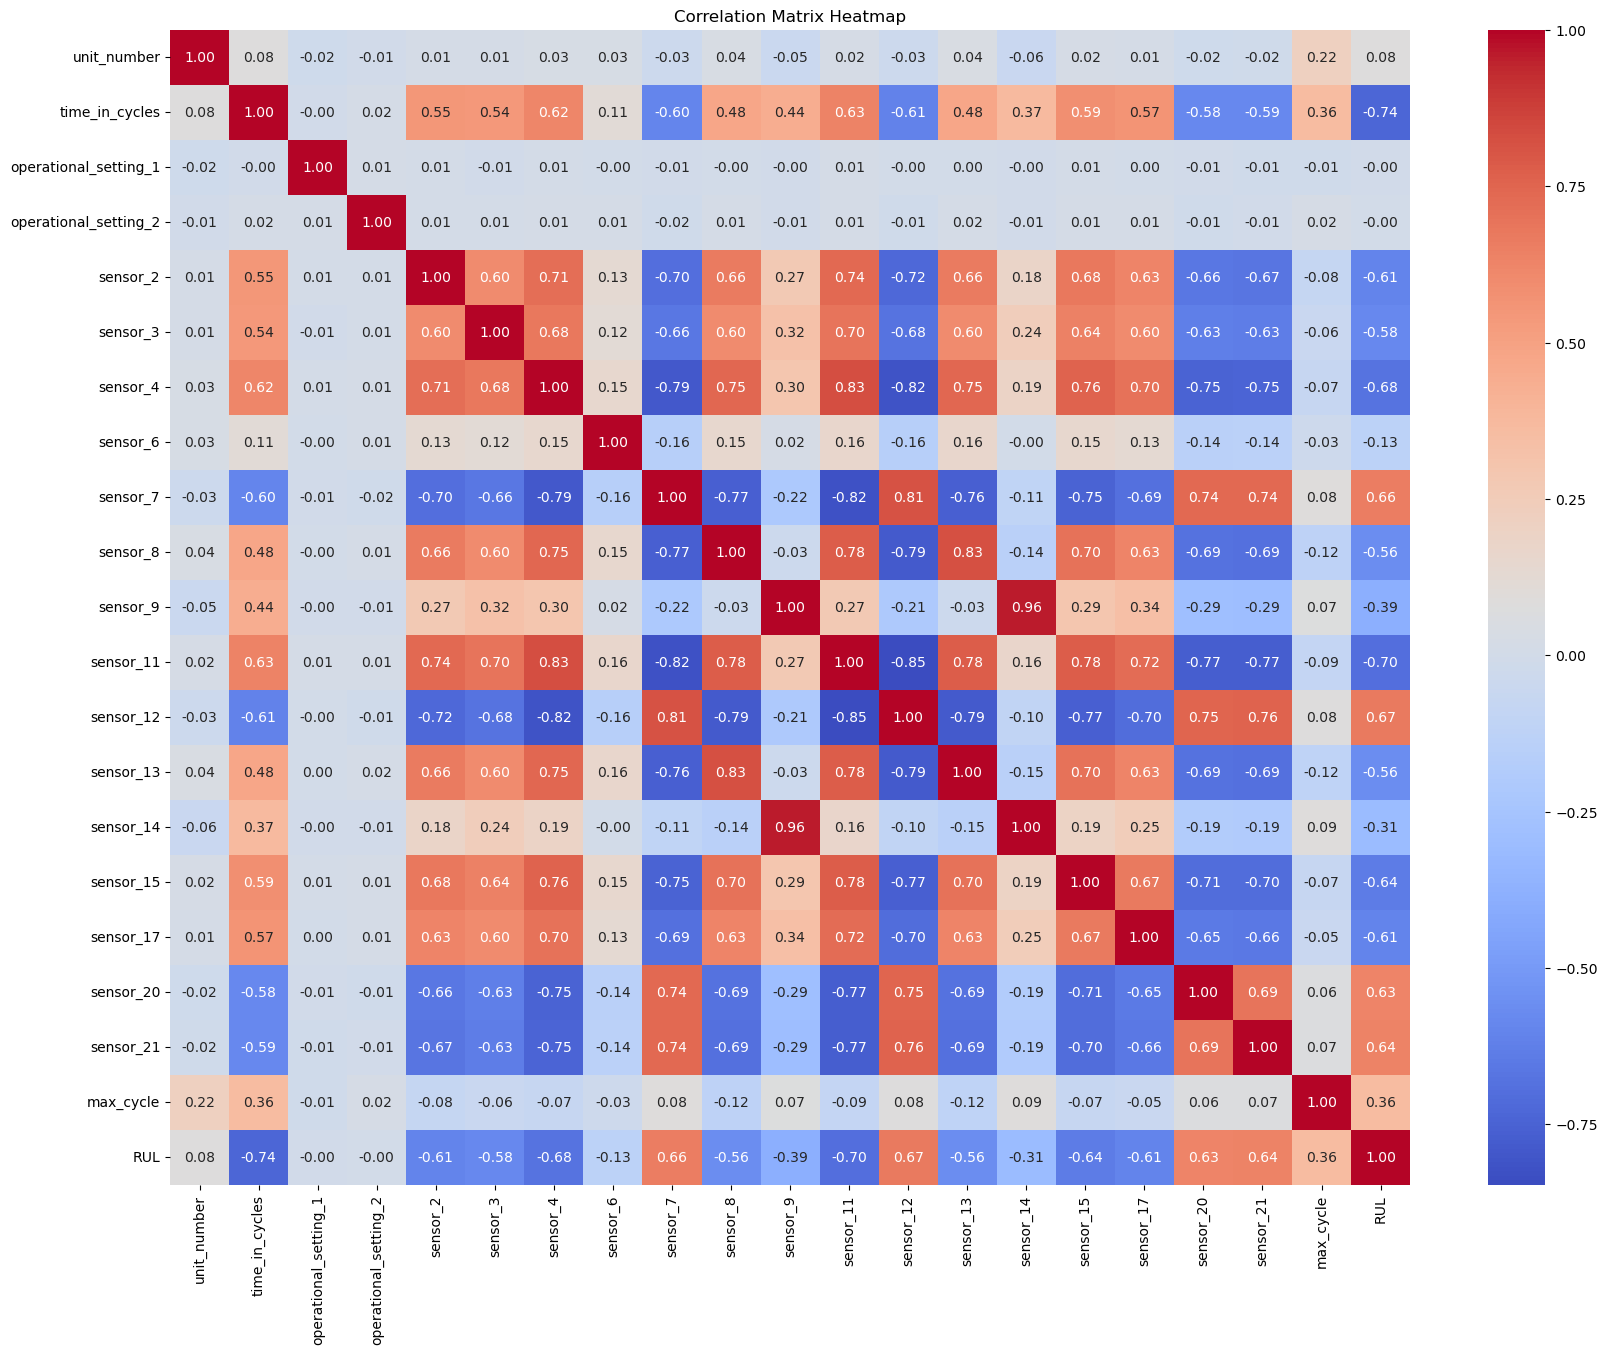

In [17]:
# Create correlation matrix heatmap
corr = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

We must note sensor 14/sensor 9's high correlation of 0.96

We log variables with a correlation below 0.05 or higher than 0.85 and verify feature importance in modeling

We should consider dropping these or running PCA to reduce dimensionality 

In [18]:
# Log variables with low correlation to RUL 
low_corr_to_rul = corr["RUL"][abs(corr["RUL"]) < 0.05].index.tolist()
low_corr_to_rul

['operational_setting_1', 'operational_setting_2']

In [19]:
# Log variables with high correlation to RUL
high_corr_to_rul = corr["RUL"][abs(corr["RUL"]) > 0.85].index.tolist()
high_corr_to_rul

['RUL']

## 4. Exploring Trends in Target Variable and Feature Distributions

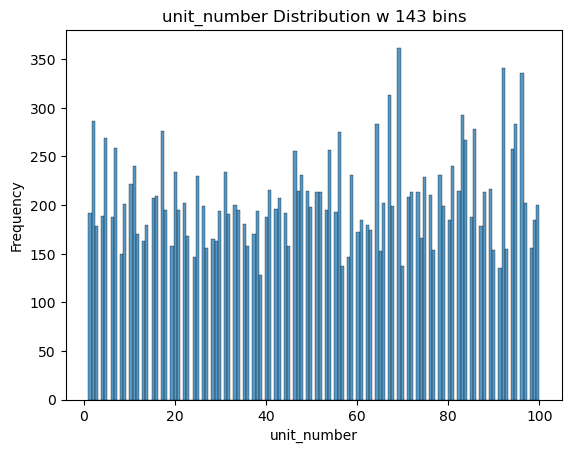

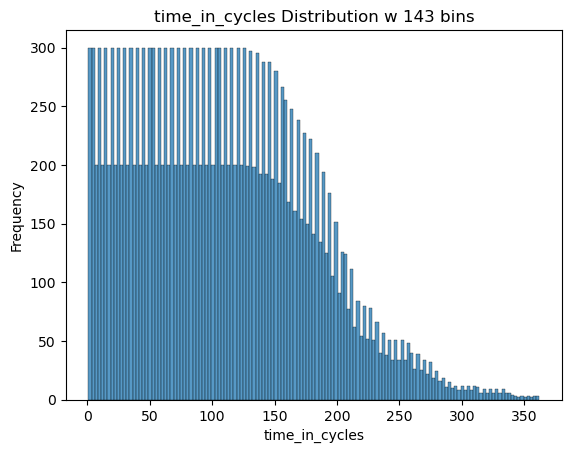

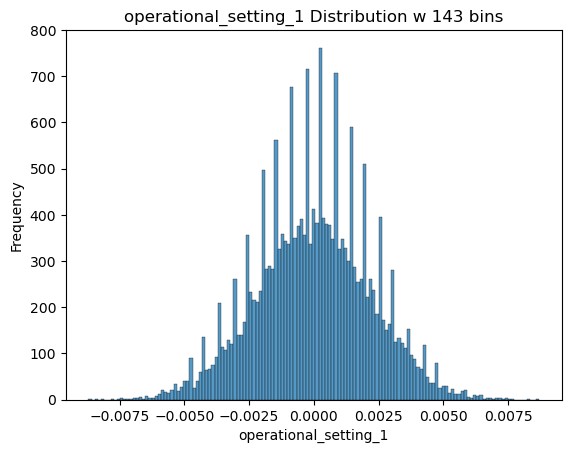

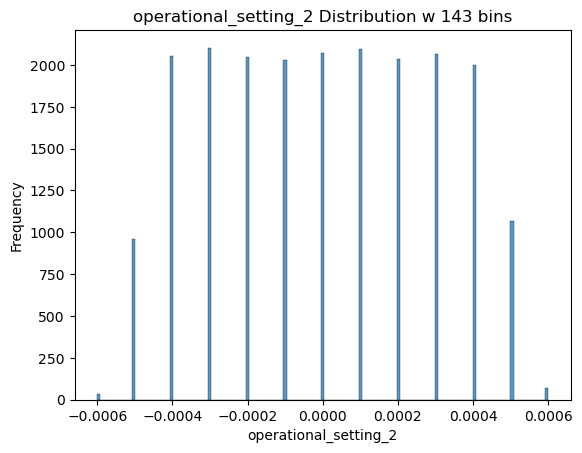

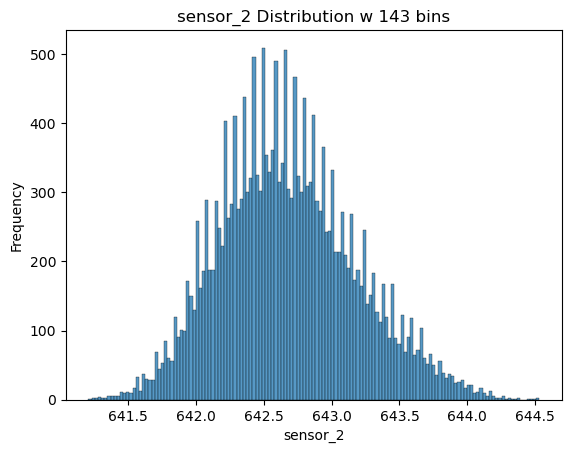

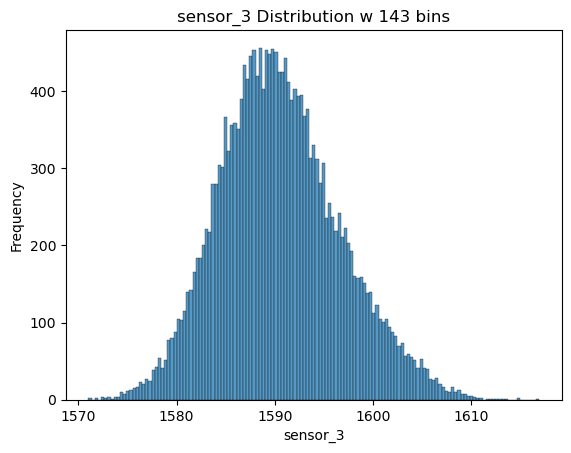

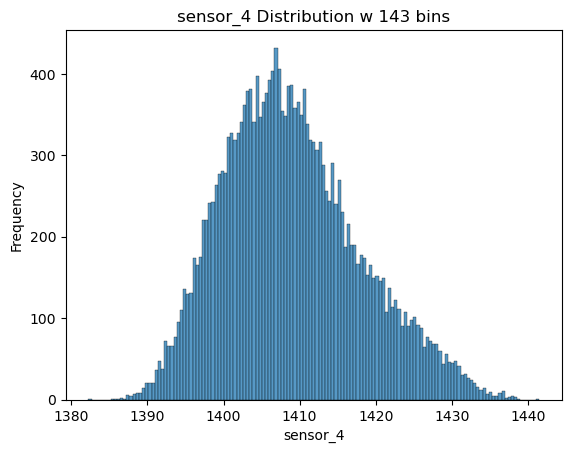

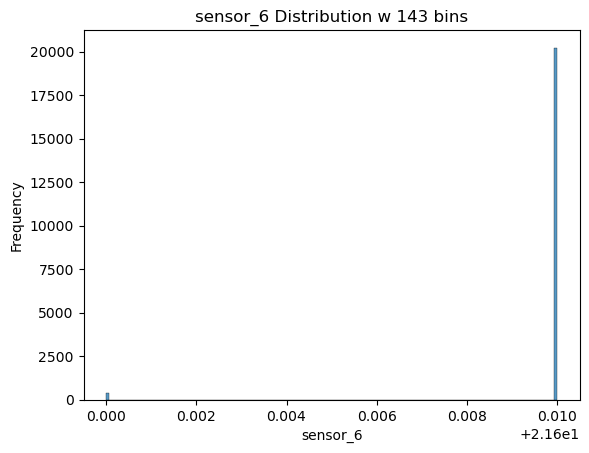

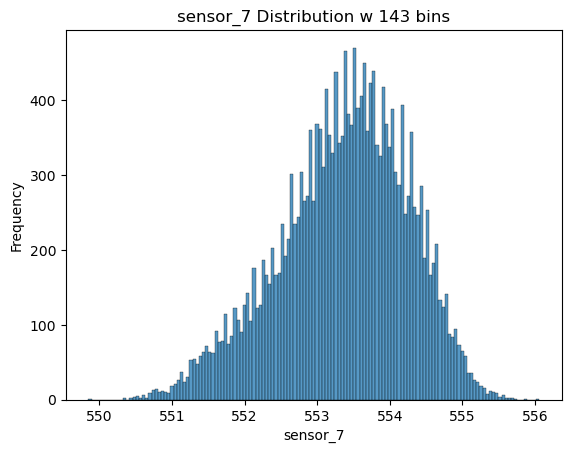

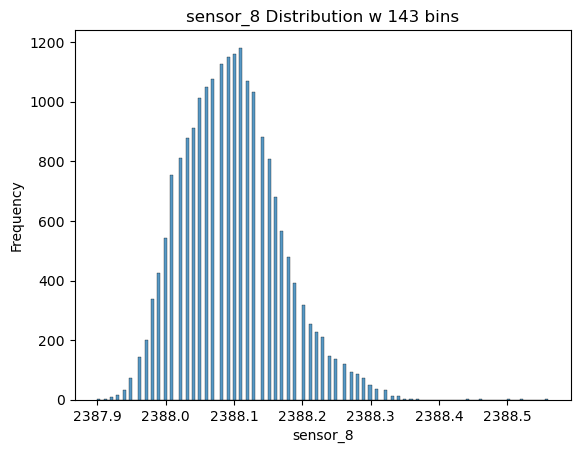

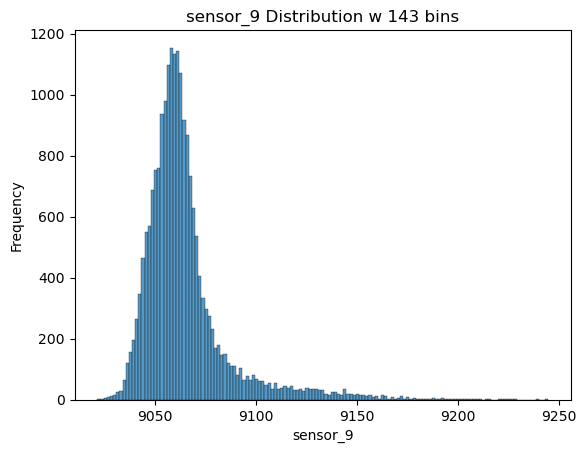

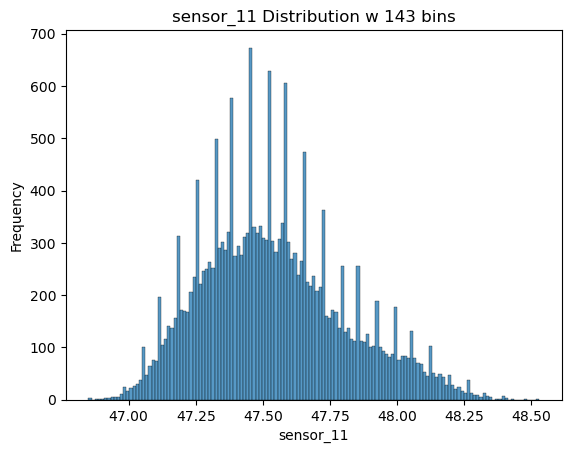

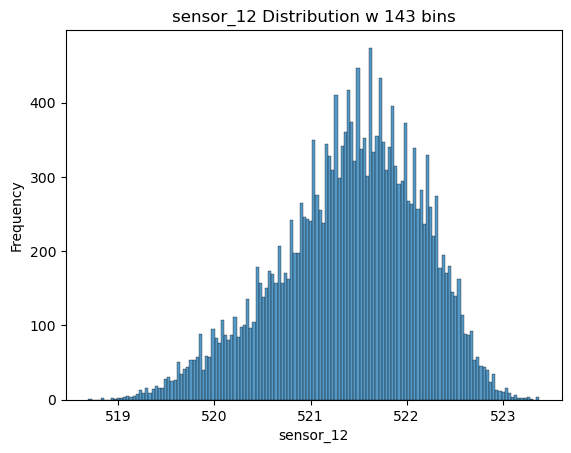

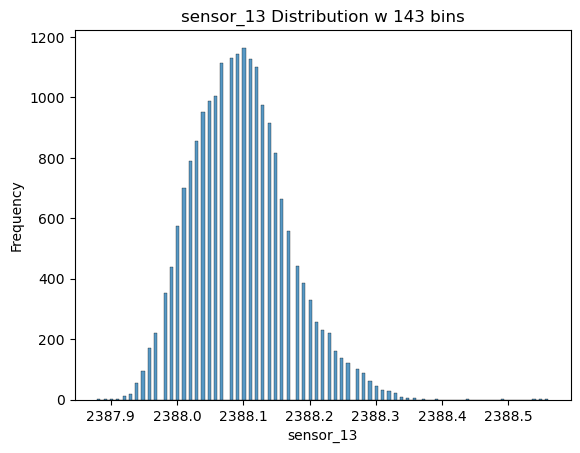

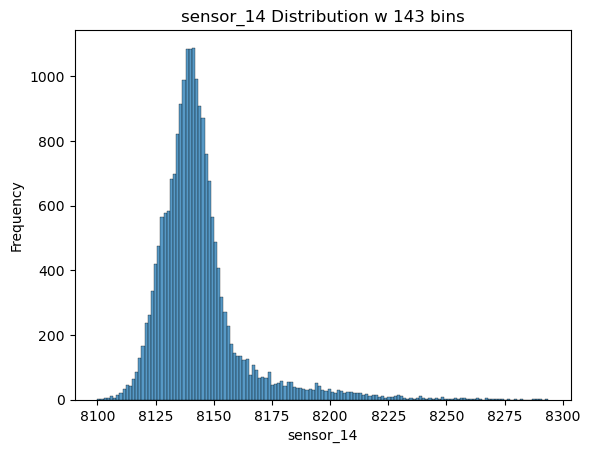

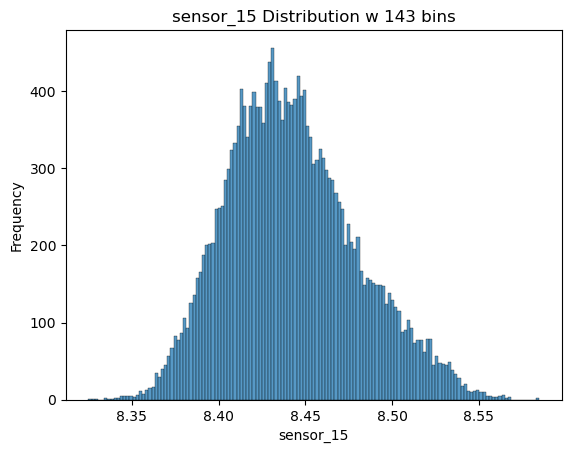

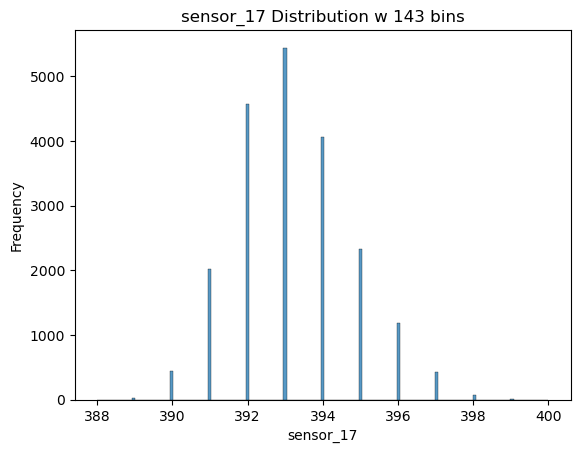

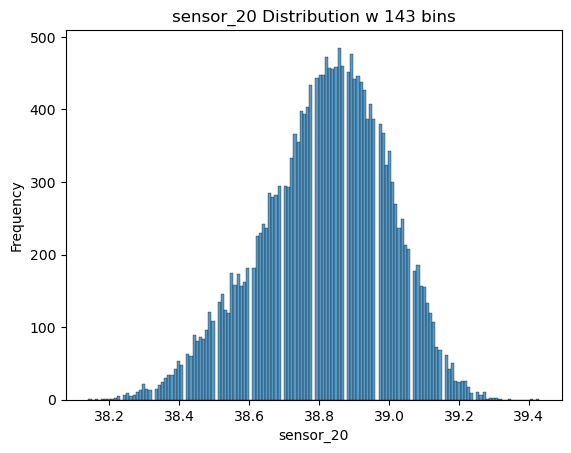

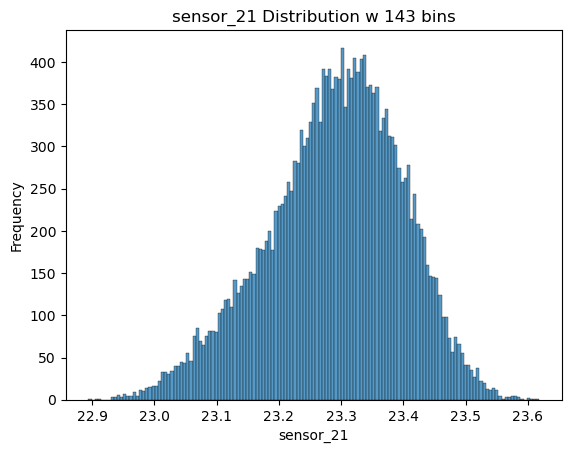

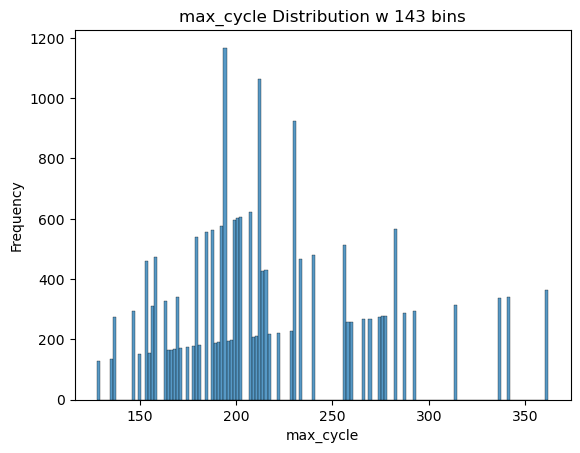

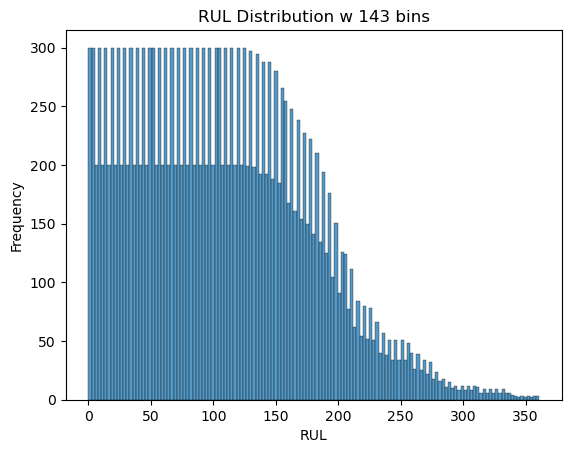

In [22]:
# Recheck distributions of variables in the dataset after dropping variables with only one unique value (Histograms)
for col in df.columns:
    sns.histplot(data=df, x=col, bins=num_bins)
    plt.title(f"{col} Distribution w 143 bins")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.show()

We must note that:
-sensor 4 has a slight right skew
-sensor 7 has a slight left skew
-sensor 8 has a right skew
-sensor 9 has an extreme right skew
-sensor 11 has a slight right skew
-sensor 12 has a slight left skew
-sensor 13 has a right skew
-sensor 14 has an extreme right skew
-sensor 17 has a slight right skew
-sensor 20 has a slight left skew
-sensor 21 has a slight left skew
-max cycle has a right skew
We must explore transformations such as log or sq root on these to normalize or use tree based models
The frequency in RUL and time_in_cyle start dropping at around 130 for both features

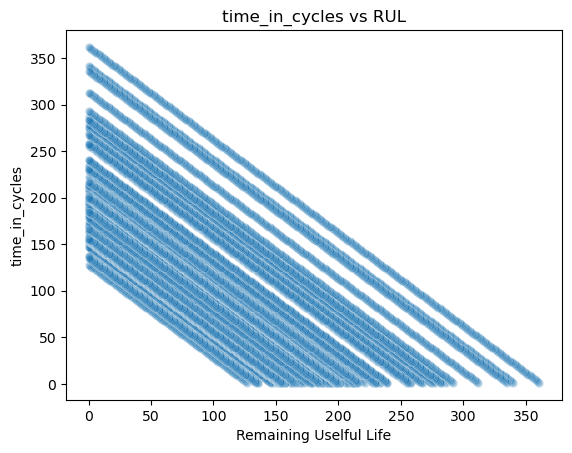

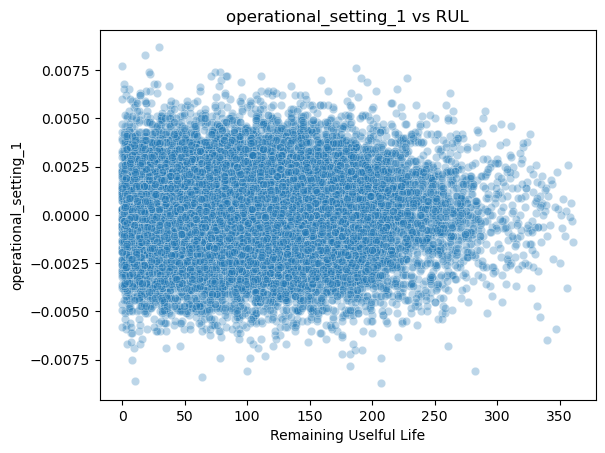

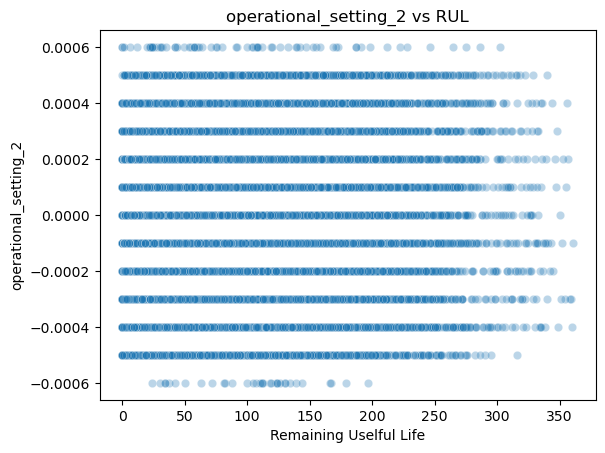

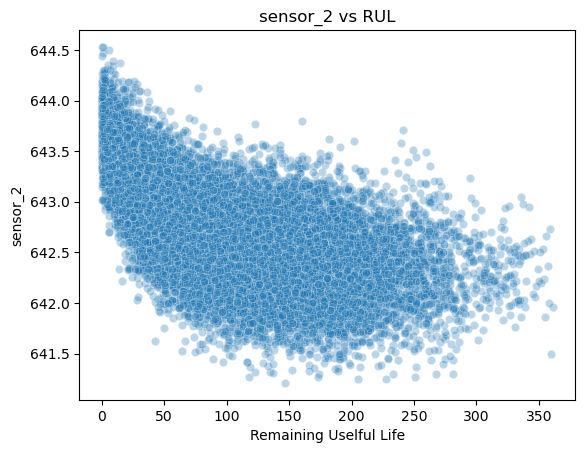

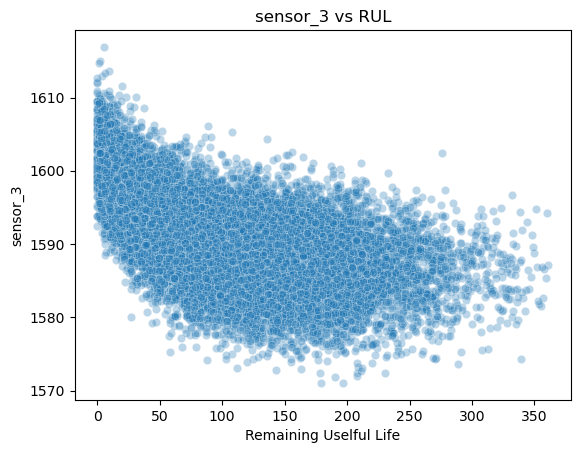

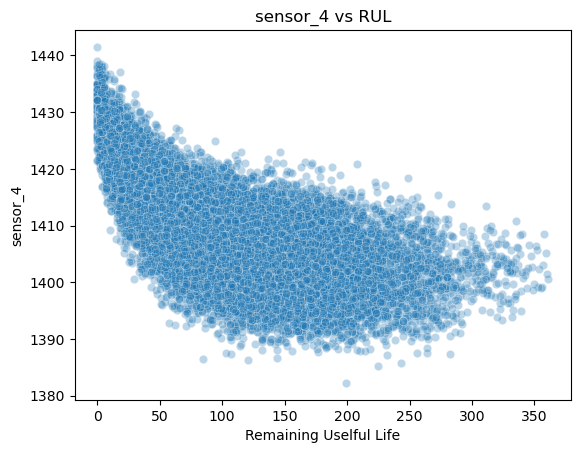

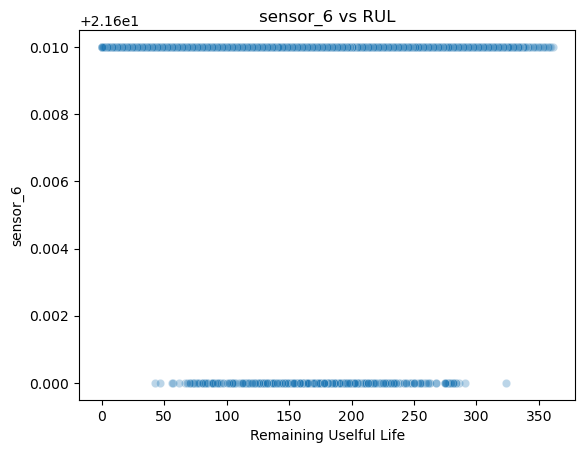

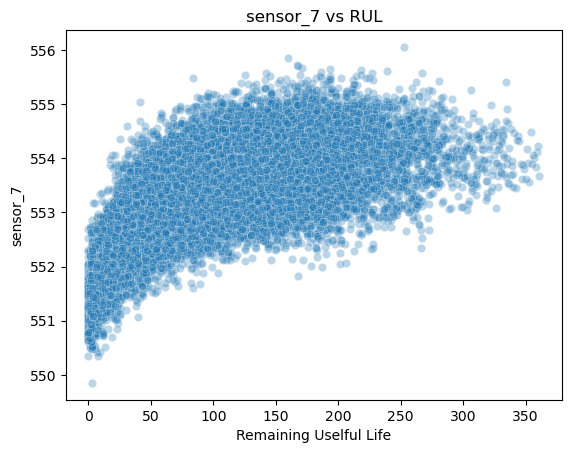

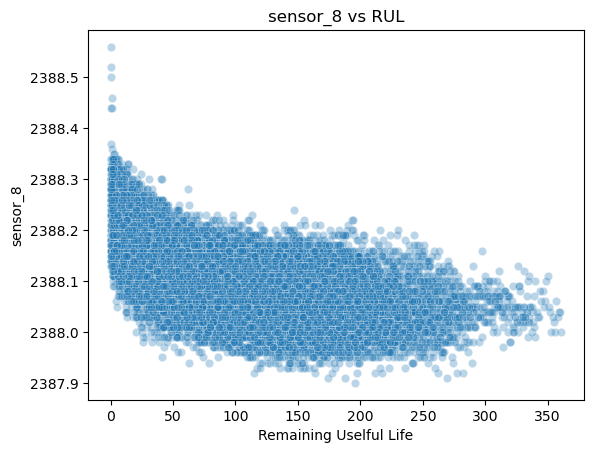

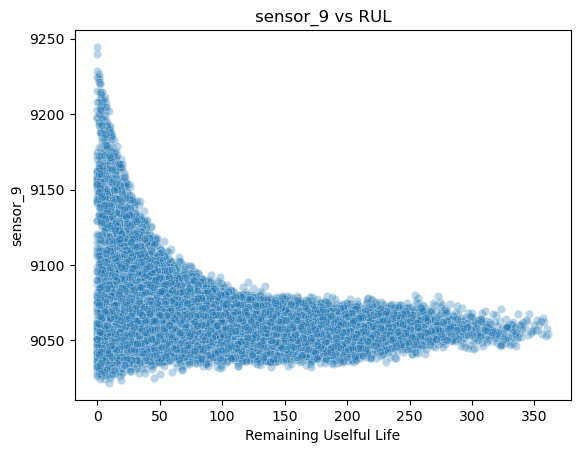

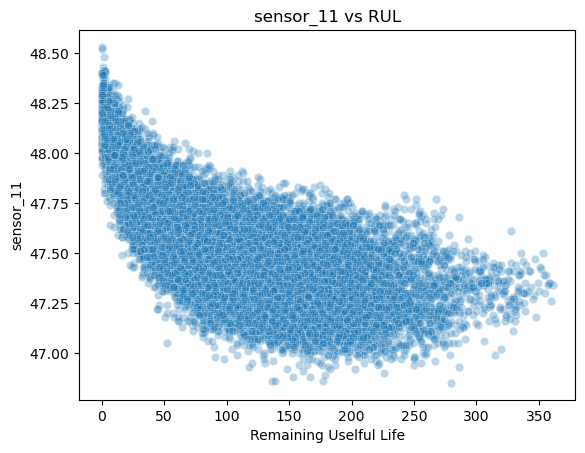

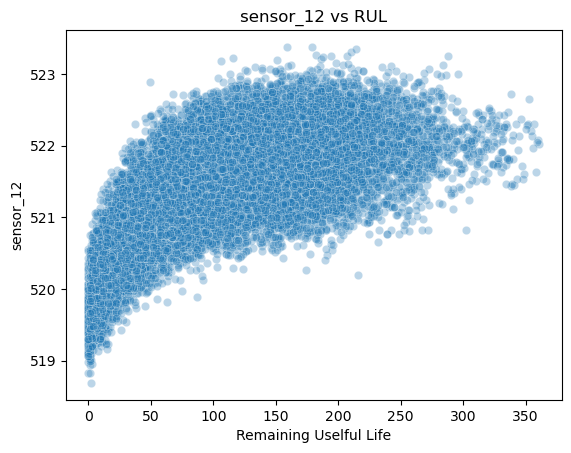

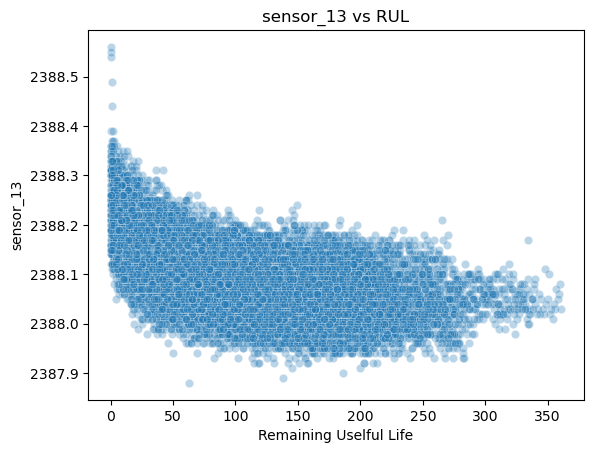

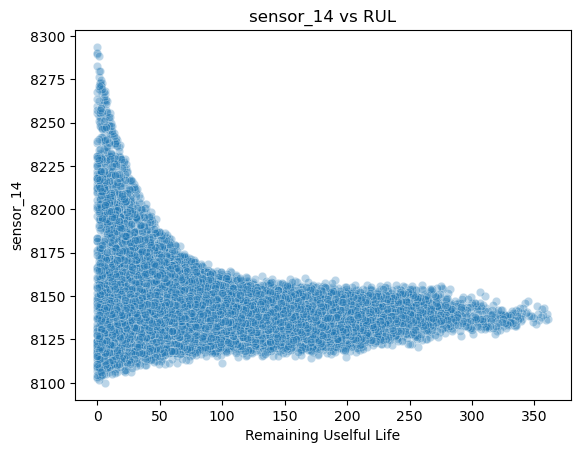

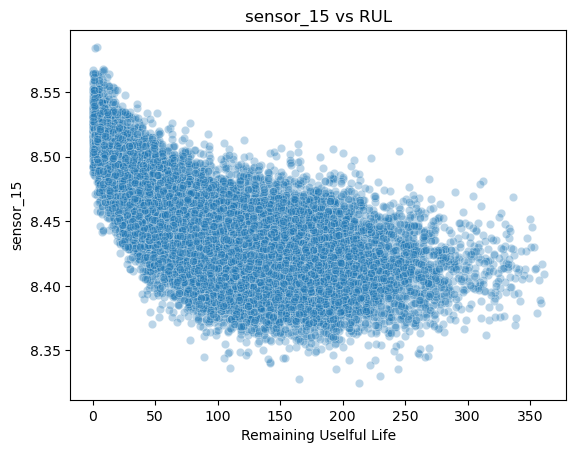

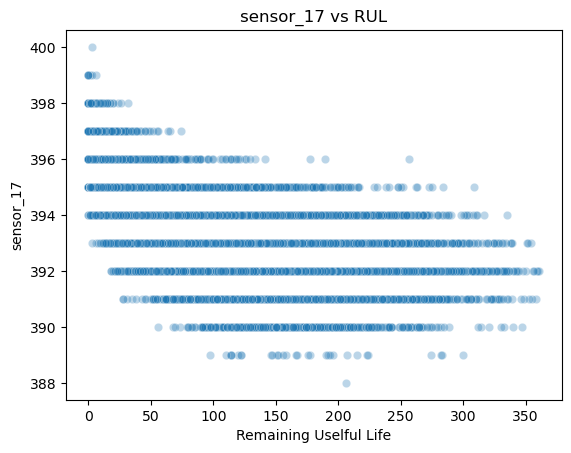

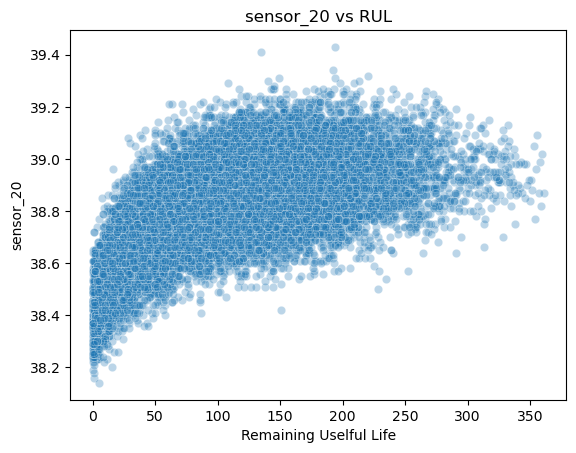

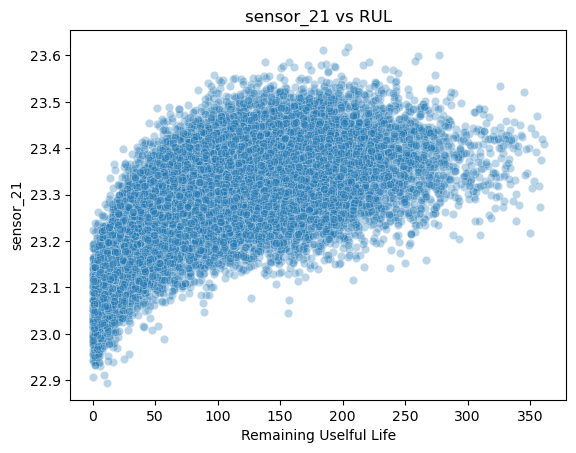

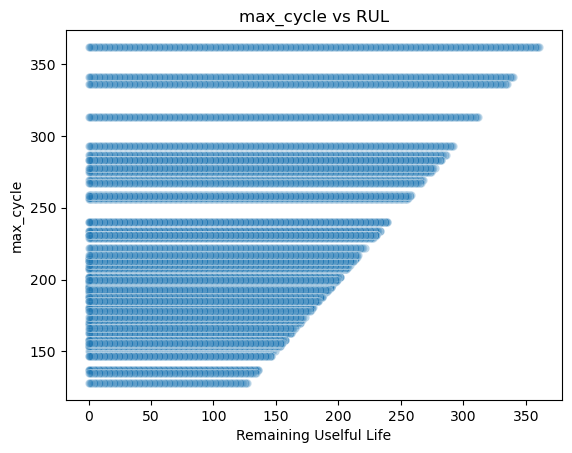

In [20]:
# Plot features against target variable (Scatterplot)
for col in df.columns:
    if col not in ["RUL", "unit_number"]:
        sns.scatterplot(data=df, x="RUL", y=col, alpha=0.3)
        plt.title(f"{col} vs RUL")
        plt.xlabel("Remaining Useful Life")
        plt.ylabel(col)
        plt.show()